### Open Text Tokenization

We started by loading the survey data from a CSV file containing participants' responses about their strategies for limiting social media access. Once the data was successfully loaded, we moved on to the data cleaning stage. This step involved removing unnecessary characters and blank responses, ensuring that only meaningful responses were retained for further analysis.

Next, we processed the cleaned data by breaking down each response into individual words, a process known as tokenization. We chose tokenization because it allowed us to convert each response into smaller, manageable units (tokens), making it easier to identify specific keywords and patterns mentioned by participants. This approach enabled us to systematically analyze the text, ensuring that we captured every relevant detail about their strategies.

We then assigned initial codes to each response based on predefined keywords related to various strategies, such as "time management," "tools," and "distraction." By checking each response for these keywords, we could assign appropriate codes that represented the strategies mentioned by participants. After assigning the initial codes, we mapped them to broader themes like "Time Management," "Application Limits," and "No/Nothing Responses." This step helped group the responses into more comprehensive categories, providing a clearer understanding of the strategies used. Finally, we visualized the frequency of each theme using a bar chart, which revealed that "Time Management," "No/Nothing Responses," and "Distraction Techniques" were the most common methods people use to limit their social media access. This systematic approach allowed us to gain valuable insights into participants' strategies for managing their social media usage.

Initial DataFrame:
  the age:   Gender:   Area: Current educational level: marital status:  \
0    13-17  feminine  Riyadh  High school or equivalent        bachelor   
1    18-24      male  Riyadh          Bachelor's degree        bachelor   
2    18-24  feminine  Riyadh          Bachelor's degree        bachelor   
3    18-24  feminine  Riyadh  High school or equivalent        bachelor   
4    35-44  feminine  Riyadh          Bachelor's degree         married   

      Employment status: Do you use social media applications?  \
0                student                                   Yes   
1           Not employed                                   Yes   
2                student                                   Yes   
3                student                                   Yes   
4  Housewife, unemployed                                   Yes   

             What social media platforms do you use?  \
0  Instagram, X (Twitter), TikTok, Snapchat, Yout...   
1  Instagram, X (Twit

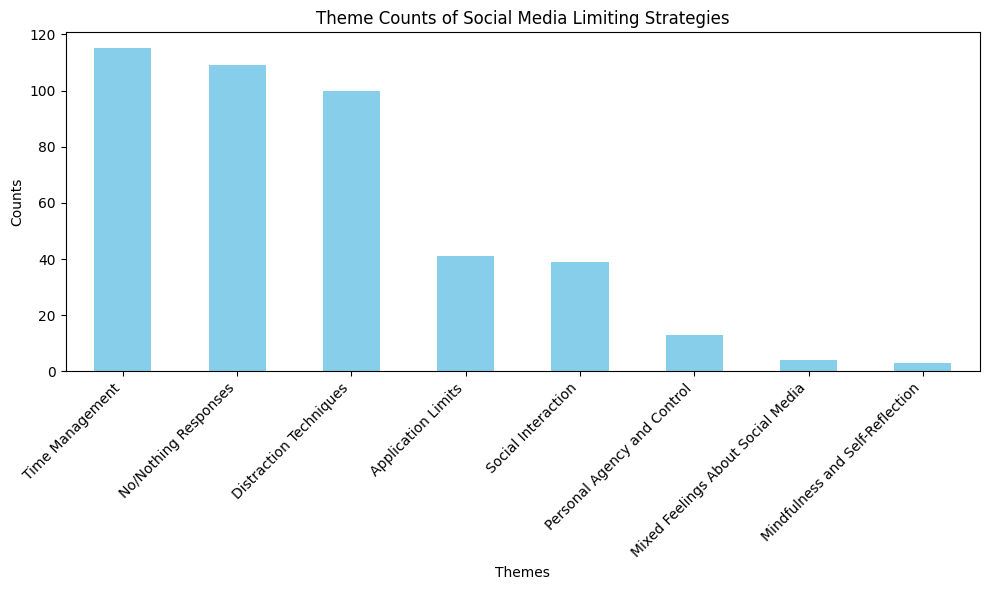

In [12]:
import pandas as pd
import re
import matplotlib.pyplot as plt

# Step 1: Load Your Data
# Load the CSV file using a different encoding
df = pd.read_csv('/content/drive/My Drive/transdata.csv', encoding='ISO-8859-1')


  # Replace with your file path
print("Initial DataFrame:")
print(df.head())  # Display the first few rows

# Step 2: Clean the Data
def clean_response(text):
    text = str(text).strip()
    if text in ['.', '', 'A', 'B', '??', '...']:
        return None
    return text

df['cleaned_response'] = df['What methods, if any, do you use to limit your social media access?'].apply(clean_response)
df = df.dropna(subset=['cleaned_response'])

# Step 3: Tokenization
def tokenize(text):
    return re.findall(r'\b\w+\b', text.lower())

df.loc[:, 'tokens'] = df['cleaned_response'].apply(tokenize)

# Inspect the DataFrame after tokenization
print("DataFrame after tokenization:")
print(df.head())

# Step 4: Generate Initial Codes
initial_codes = {
    'time_management': ['limit', 'time', 'hours', 'schedule', 'timer'],
    'tools': ['apps', 'blocker', 'delete'],
    'personal_strategies': ['detox', 'break', 'reward', 'go out', 'hobbies'],
    'distraction': ['busy', 'occupy', 'family', 'friends', 'chores'],
    'mindfulness': ['reflect', 'think', 'impact'],
    'social_interaction': ['gathering', 'friends', 'family'],
    'personal_control': ['control', 'decide', 'goals'],
    'mixed_feelings': ['enjoy', 'positive', 'reward'],
    'no_nothing': ['no', 'nothing'],  # New entry for "no" and "nothing"
}

def code_response(tokens):
    codes = []
    for code, keywords in initial_codes.items():
        if any(keyword in tokens for keyword in keywords):
            codes.append(code)
    return codes

# Generate codes
df.loc[:, 'codes'] = df['tokens'].apply(code_response)

# Check if 'codes' was created successfully
print("DataFrame after coding:")
print(df[['cleaned_response', 'tokens', 'codes']].head())

# Check if 'codes' column exists
if 'codes' in df.columns:
    # Step 5: Define themes
    themes = {
        'Device Management': ['device_management'],
        'Application Limits': ['tools'],
        'Time Management': ['time_management'],
        'Mixed Feelings About Social Media': ['mixed_feelings'],
        'Distraction Techniques': ['distraction'],
        'Mindfulness and Self-Reflection': ['mindfulness'],
        'Social Interaction': ['social_interaction'],
        'Personal Agency and Control': ['personal_control'],
        'No/Nothing Responses': ['no_nothing'],  # New entry for the theme
    }

    # Function to assign themes
    def assign_theme(codes):
        assigned_themes = []
        for theme, codes_list in themes.items():
            if any(code in codes for code in codes_list):
                assigned_themes.append(theme)
        return assigned_themes

    # Assign themes
    df.loc[:, 'themes'] = df['codes'].apply(assign_theme)

    # Display the final DataFrame with themes
    print("Final DataFrame with themes:")
    print(df[['What methods, if any, do you use to limit your social media access?', 'cleaned_response', 'tokens', 'codes', 'themes']])

    # Print out the theme counts for further analysis
    theme_counts = df['themes'].explode().value_counts()
    print("Theme counts:")
    print(theme_counts)
else:
    print("Error: 'codes' column is missing.")


# Step 5: Visualization
plt.figure(figsize=(10, 6))
theme_counts.plot(kind='bar', color='skyblue')
plt.title('Theme Counts of Social Media Limiting Strategies')
plt.xlabel('Themes')
plt.ylabel('Counts')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

###